In [2]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

### 1) \$|E_{n}-E_{\mathcal{S}{}_n}|<C\$

In [189]:
J1,J3,D,h = 1.0,0.1,0.1,1.0
num_n::Int64 = 3
N_max::Int64,N_step::Int64 = 18,2
boundary = "OBC"
use_sparse = false
energy_diff_cutoff::Int64 = 3

N_list_n::Vector{Vector{Int64}} = Vector{Vector{Int64}}(undef,num_n)
avg_scar_mat_elem_list_n::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,num_n)
std_scar_mat_elem_list_n::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,num_n)
n_list::Vector{Int64} = Vector{Int64}(undef,num_n)
H_size_list_n::Vector{Vector{Int64}} = Vector{Vector{Int64}}(undef,num_n)

scar_top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\matrix_element_scaling\\$(boundary)")
for n in 1:num_n
    if n == 3
        file = joinpath(scar_top_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_Ediffcutoff=$(energy_diff_cutoff).jld2")
        mat_elem_file = JLD2.load(file)
        N_list_n[n] = mat_elem_file["N_vals"]
        avg_scar_mat_elem_list_n[n] = mat_elem_file["avg_scar_matrix_element_vals"]
        std_scar_mat_elem_list_n[n] = mat_elem_file["std_scar_matrix_element_vals"]
        H_size_list_n[n] = mat_elem_file["H_size_vals"]
        n_list[n] = n
    end
end;

In [190]:
n = 3
th_state_index::Int64 = 4

thermal_top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\matrix_element_scaling\\$(boundary)")
file = joinpath(thermal_top_folder,"thermal_state_Sn=$(n)+$(th_state_index)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_Ediffcutoff=$(energy_diff_cutoff).jld2")
thermal_mat_elem_file = JLD2.load(file)
th_N_list = thermal_mat_elem_file["N_vals"]
avg_th_mat_list = thermal_mat_elem_file["avg_thermal_matrix_element_vals"]
std_th_mat_list = thermal_mat_elem_file["std_thermal_mat_elem_vals"]
th_H_size_list = thermal_mat_elem_file["H_size_vals"];

#### Avg.

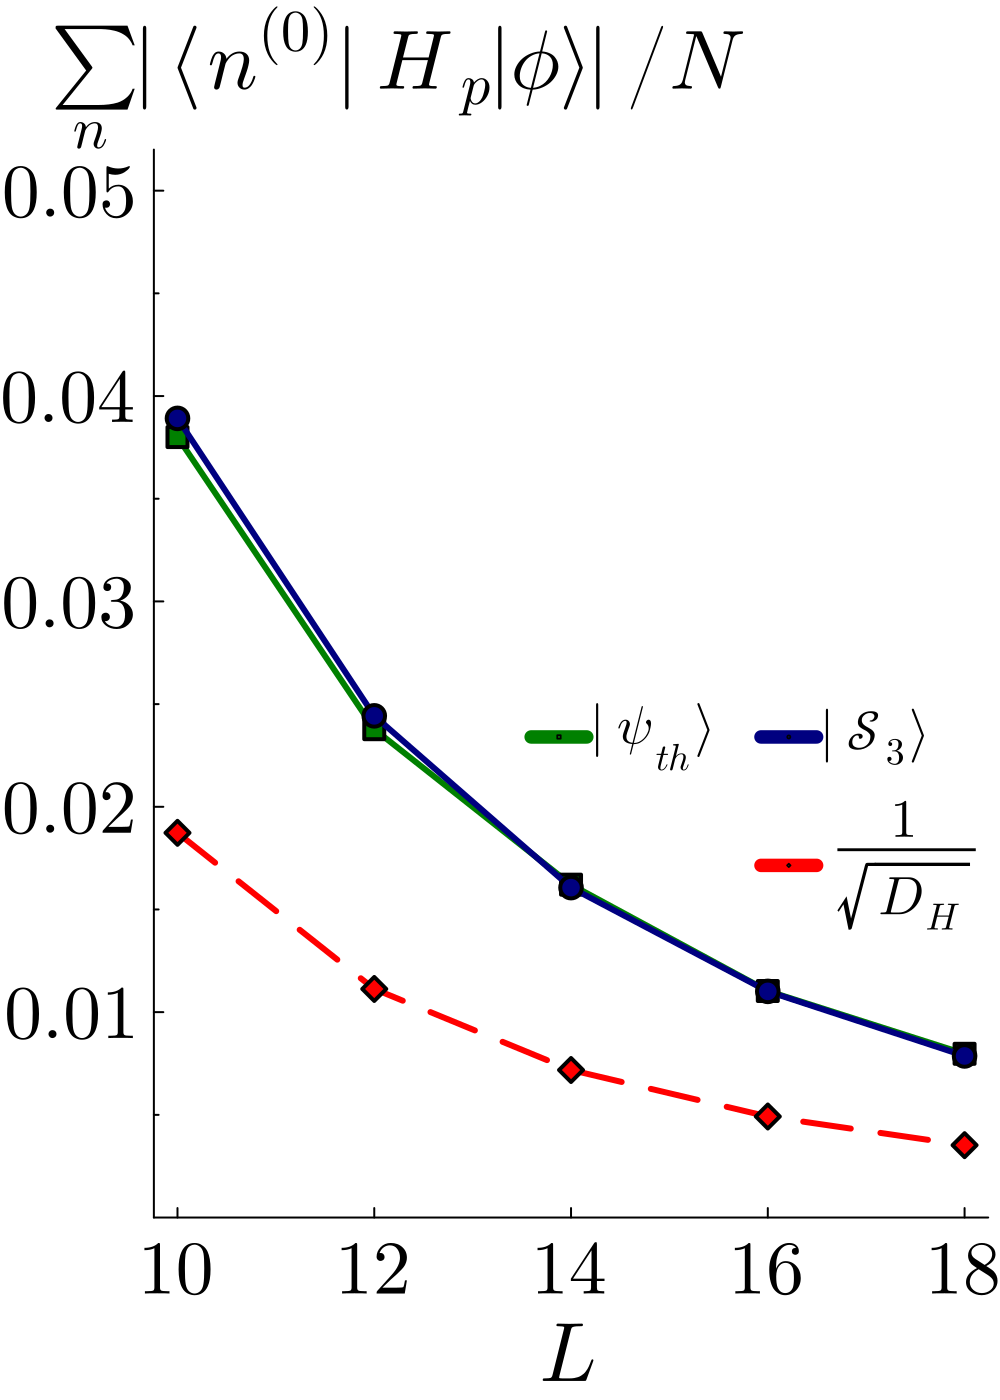

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\matrix_element_scaling\\OBC\\avg_Sn=3_J1=1.0_J3=0.1_D=0.1_h=1.0_Nmax=18_Nstep=2_Ediffcutoff=3.png"

In [193]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (500,700)
default(fontfamily="Computer Modern")

n = 3
clip1,clip2 = 1,length(N_list_n[n])

inv_root_H_size_list = 1 ./sqrt.(H_size_list_n[n])

p = plot(th_N_list[clip1:clip2],avg_th_mat_list[clip1:clip2],m=:square,ms=5,msw=2,msc=:black,
              lw=3,ls=:solid,c=:green,label="\$|\\psi_{th}\\rangle\$",size=plot_size,dpi=200)

# p = plot(N_list_n[n][clip1:clip2],avg_scar_mat_elem_list_n[n][clip1:clip2],m=:circle,ms=6,msw=2,msc=:black,
#       lw=3,ls=:solid,c=:navy,label="\$|\\mathcal{S}{}_{$(n_list[n])}\\rangle\$",size=plot_size,dpi=200)

plot!(N_list_n[n][clip1:clip2],avg_scar_mat_elem_list_n[n][clip1:clip2],m=:circle,ms=6,msw=2,msc=:black,
              lw=3,ls=:solid,c=:navy,label="\$|\\mathcal{S}{}_{$(n_list[n])}\\rangle\$")

plot!([NaN],[NaN],linecolor=:transparent,label=" ")

plot!(N_list_n[n][clip1:clip2],inv_root_H_size_list[clip1:clip2],m=:diamond,ms=6,msw=2,msc=:black,
              lw=3,ls=:dash,c=:red,label="\$\\frac{1}{\\sqrt{D_H}}\$")

plot!(left_margin=3.5mm,right_margin=-0.5mm,top_margin=17mm,bottom_margin=-4mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.53,0.45),legendfontsize=18,legend_background_color=:false, #0.53,0.34
    legend_foreground_color=:false,legend_columns=2)

xlabel!("\$L\$",guidefontsize=28)
# ylabel!("\$\\sum_n|\\langle n^{(0)}|H_p|\\mathcal{S}{}_{$(n_list[n])}\\rangle|/N\$",guidefontsize=21)
# ylabel!("\$\\sum_n|\\langle n^{(0)}|H_p|\\phi\\rangle|/N\$",guidefontsize=21)
# title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 10,2,18
y1,y_step,y2 = 0.01,0.01,0.05
# x1,x_step,x2 = 20,4,36
# y1,y_step,y2 = 0.01,0.01,0.03
xticks = (x1:x_step:x2,[@sprintf("%.0f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 0
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=24,tick_direction=:in)
plot!(ylims=(0.0,0.052))
annotate!(12.2,0.0555,text("\$\\sum_n|\\langle n^{(0)}|H_p|\\phi\\rangle|/N\$",:black,28))
# annotate!(25.2,0.034,text("\$\\sum_n|\\langle n^{(0)}|H_p|\\mathcal{S}{}_{$(n_list[n])}\\rangle|/N\$",:black,28))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\matrix_element_scaling\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"avg_Sn=$(n_list[n])_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_Ediffcutoff=$(energy_diff_cutoff).png")

display(p)
# savefig(p,file_path)

#### Std.

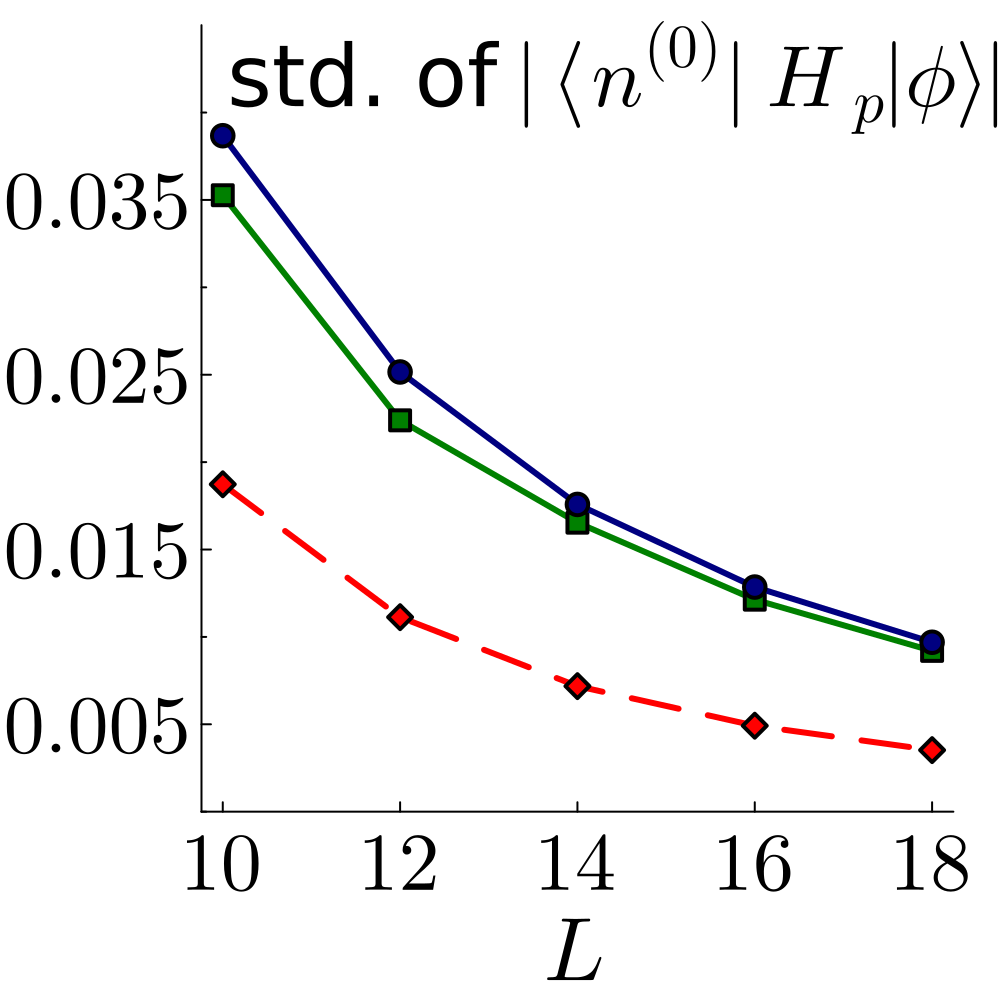

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\matrix_element_scaling\\OBC\\std_Sn=3_J1=1.0_J3=0.1_D=0.1_h=1.0_Nmax=18_Nstep=2_Ediffcutoff=3.png"

In [207]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (500,500)
default(fontfamily="Computer Modern")

n = 3
clip1,clip2 = 1,length(N_list_n[n])

inv_root_H_size_list = 1 ./sqrt.(H_size_list_n[n])

p = plot(th_N_list[clip1:clip2],std_th_mat_list[clip1:clip2],m=:square,ms=5,msw=2,msc=:black,
              lw=3,ls=:solid,c=:green,label="\$|\\psi_{th}\\rangle\$",size=plot_size,dpi=200)

# p = plot(N_list_n[n][clip1:clip2],std_scar_mat_elem_list_n[n][clip1:clip2],m=:circle,ms=6,msw=2,msc=:black,
#     lw=3,ls=:solid,c=:navy,label="\$|\\mathcal{S}{}_{$(n_list[n])}\\rangle\$",size=plot_size,dpi=200)

plot!(N_list_n[n][clip1:clip2],std_scar_mat_elem_list_n[n][clip1:clip2],m=:circle,ms=6,msw=2,msc=:black,
              lw=3,ls=:solid,c=:navy,label="\$|\\mathcal{S}{}_{$(n_list[n])}\\rangle\$")

plot!(N_list_n[n][clip1:clip2],inv_root_H_size_list[clip1:clip2],m=:diamond,ms=6,msw=2,msc=:black,
              lw=3,ls=:dash,c=:red,label="\$\\frac{1}{\\sqrt{D_H}}\$")

plot!(left_margin=-1.5mm,right_margin=3.8mm,top_margin=1.2mm,bottom_margin=-4.5mm)
# plot!(left_margin=6mm,right_margin=6.8mm,top_margin=1.2mm,bottom_margin=-4mm)
plot!(framestyle=:axis,legend=:false)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$L\$",guidefontsize=30)
# ylabel!("\$\\sum_n|\\langle n^{(0)}|H_p|\\mathcal{S}{}_{$(n_list[n])}\\rangle|/N\$",guidefontsize=21)
# ylabel!("\$\\sum_n|\\langle n^{(0)}|H_p|\\phi\\rangle|/N\$",guidefontsize=21)
# title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 10,2,18
y1,y_step,y2 = 0.0050,0.010,0.035
# x1,x_step,x2 = 20,4,36
# y1,y_step,y2 = 0.01,0.01,0.03
xticks = (x1:x_step:x2,[@sprintf("%.0f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.3f",y) for y in y1:y_step:y2])
xminor_ticks = 0
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=26,tick_direction=:in)
plot!(ylims=(0.0,0.045))
annotate!(14.6,0.042,text("std. of \$|\\langle n^{(0)}|H_p|\\phi\\rangle|\$",:black,29))
# annotate!(29.1,0.032,text("std. of \$|\\langle n^{(0)}|H_p|\\mathcal{S}{}_{$(n_list[n])}\\rangle|\$",:black,29))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\matrix_element_scaling\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"std_Sn=$(n_list[n])_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_Ediffcutoff=$(energy_diff_cutoff).png")

display(p)
# savefig(p,file_path)

### 2) \$N\$ no. of states with smallest \$|E_{n}-E_{\mathcal{S}{}_n}|\$

In [3]:
J1,J3,D,h = 1.0,0.1,0.1,1.0
num_n::Int64 = 3
N_max::Int64,N_step::Int64 = 18,2
# N_max::Int64,N_step::Int64 = 36,4
boundary = "OBC"
use_sparse = false
num_energy::Int64 = 800

N_list_n::Vector{Vector{Int64}} = Vector{Vector{Int64}}(undef,num_n)
avg_scar_mat_elem_list_n::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,num_n)
std_scar_mat_elem_list_n::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,num_n)
n_list::Vector{Int64} = Vector{Int64}(undef,num_n)
H_size_list_n::Vector{Vector{Int64}} = Vector{Vector{Int64}}(undef,num_n)

scar_top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\matrix_element_scaling\\$(boundary)")
for n in 1:num_n
    if n == 3
        file = joinpath(scar_top_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_numenergy=$(num_energy).jld2")
        mat_elem_file = JLD2.load(file)
        N_list_n[n] = mat_elem_file["N_vals"]
        avg_scar_mat_elem_list_n[n] = mat_elem_file["avg_scar_matrix_element_vals"]
        std_scar_mat_elem_list_n[n] = mat_elem_file["std_scar_matrix_element_vals"]
        H_size_list_n[n] = mat_elem_file["H_size_vals"]
        n_list[n] = n
    end
end;

In [4]:
n = 3
th_state_index::Int64 = 4

thermal_top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\matrix_element_scaling\\$(boundary)")
file = joinpath(thermal_top_folder,"thermal_state_Sn=$(n)+$(th_state_index)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_numenergy=$(num_energy).jld2")
thermal_mat_elem_file = JLD2.load(file)
th_N_list = thermal_mat_elem_file["N_vals"]
avg_th_mat_list = thermal_mat_elem_file["avg_thermal_matrix_element_vals"]
std_th_mat_list = thermal_mat_elem_file["std_thermal_mat_elem_vals"]
th_H_size_list = thermal_mat_elem_file["H_size_vals"];

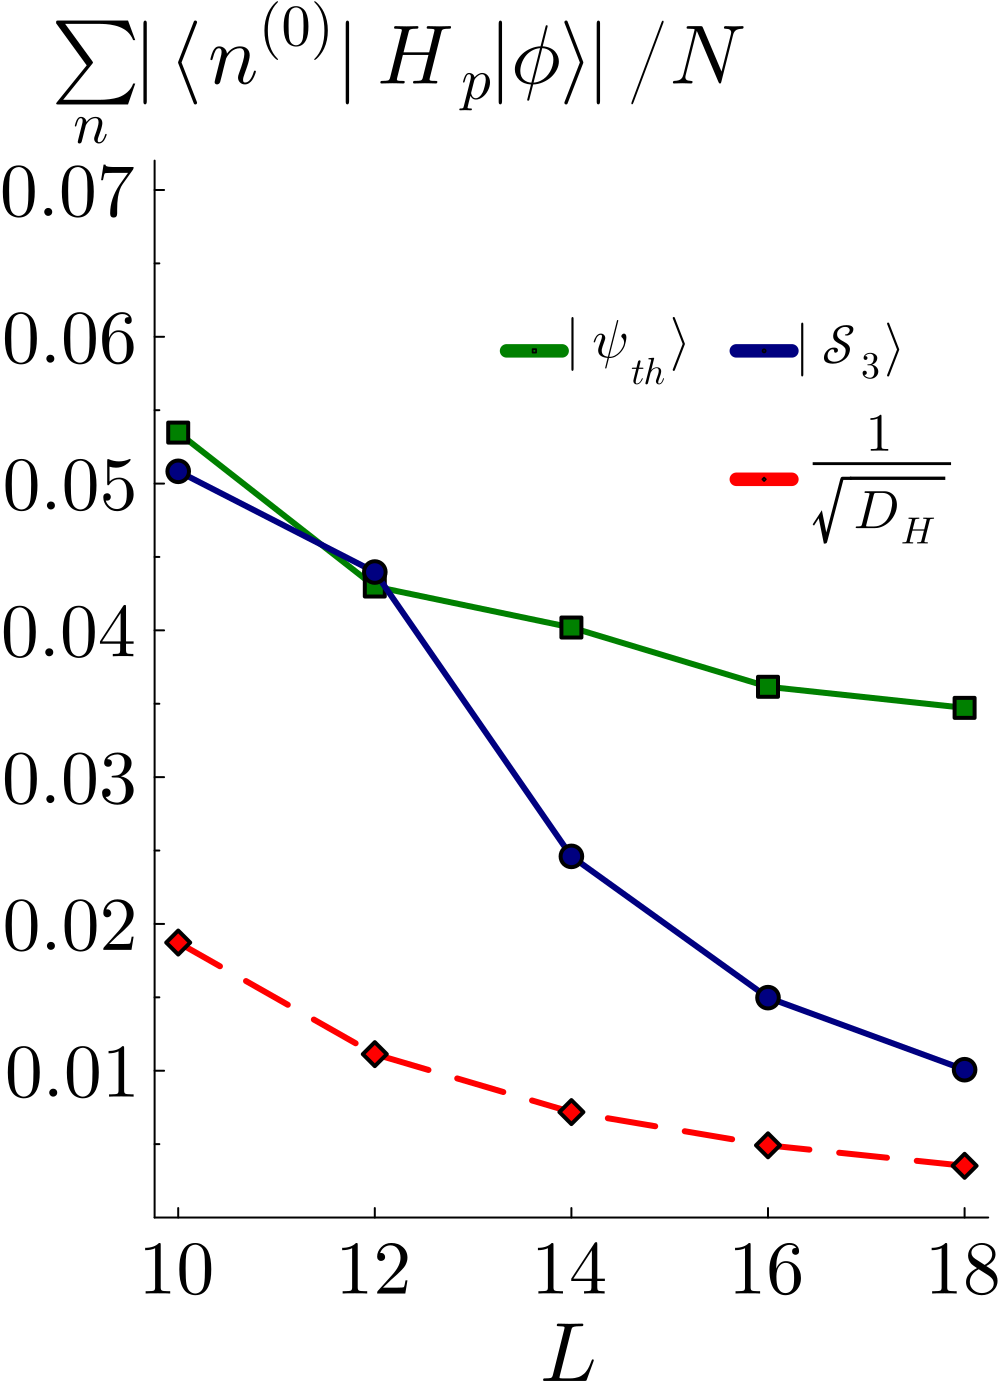

In [10]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (500,700)
default(fontfamily="Computer Modern")

n = 3
clip1,clip2 = 1,length(N_list_n[n])

inv_root_H_size_list = 1 ./sqrt.(H_size_list_n[n])

p = plot(th_N_list[clip1:clip2],avg_th_mat_list[clip1:clip2],m=:square,ms=5,msw=2,msc=:black,
              lw=3,ls=:solid,c=:green,label="\$|\\psi_{th}\\rangle\$",size=plot_size,dpi=200)

# p = plot(N_list_n[n][clip1:clip2],avg_scar_mat_elem_list_n[n][clip1:clip2],m=:circle,ms=6,msw=2,msc=:black,
#       lw=3,ls=:solid,c=:navy,label="\$|\\mathcal{S}{}_{$(n_list[n])}\\rangle\$",size=plot_size,dpi=200)

plot!(N_list_n[n][clip1:clip2],avg_scar_mat_elem_list_n[n][clip1:clip2],m=:circle,ms=6,msw=2,msc=:black,
              lw=3,ls=:solid,c=:navy,label="\$|\\mathcal{S}{}_{$(n_list[n])}\\rangle\$")

plot!([NaN],[NaN],linecolor=:transparent,label=" ")

plot!(N_list_n[n][clip1:clip2],inv_root_H_size_list[clip1:clip2],m=:diamond,ms=6,msw=2,msc=:black,
              lw=3,ls=:dash,c=:red,label="\$\\frac{1}{\\sqrt{D_H}}\$")

# plot!(left_margin=3mm,right_margin=-1mm,top_margin=15mm,bottom_margin=-4mm)
plot!(left_margin=3.5mm,right_margin=-0.5mm,top_margin=18.4mm,bottom_margin=-4mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.5,0.82),legendfontsize=18,legend_background_color=:false, #0.5,0.6
    legend_foreground_color=:false,legend_columns=2)

xlabel!("\$L\$",guidefontsize=28)
# ylabel!("\$\\sum_n|\\langle n^{(0)}|H_p|\\mathcal{S}{}_{$(n_list[n])}\\rangle|/N\$",guidefontsize=21)
# ylabel!("\$\\sum_n|\\langle n^{(0)}|H_p|\\phi\\rangle|/N\$",guidefontsize=21)
# title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 10,2,18
y1,y_step,y2 = 0.01,0.01,0.07
# x1,x_step,x2 = 20,4,36
# y1,y_step,y2 = 0.01,0.02,0.06
xticks = (x1:x_step:x2,[@sprintf("%.0f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 0
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=24,tick_direction=:in)
plot!(ylims=(0.0,0.072))
annotate!(12.2,0.078,text("\$\\sum_n|\\langle n^{(0)}|H_p|\\phi\\rangle|/N\$",:black,28))
# annotate!(25.2,0.066,text("\$\\sum_n|\\langle n^{(0)}|H_p|\\mathcal{S}{}_{$(n_list[n])}\\rangle|/N\$",:black,28))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\matrix_element_scaling\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"avg_Sn=$(n_list[n])_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step)_numenergy=$(num_energy).png")

display(p)
# savefig(p,file_path)